In [31]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('experiment_logbook_architecture_20.csv')

# Display the DataFrame
print(df.columns)


Index(['achitecture', 'best_epoch', 'best_val', 'best_train', 'training_loss',
       'validation_loss'],
      dtype='object')


In [32]:
df['achitecture']

0              (128, 256, 256)
1               (512, 32, 128)
2                (512, 64, 64)
3               (512, 64, 128)
4               (512, 128, 32)
                ...           
58    (64, 128, 256, 128, 256)
59     (64, 128, 256, 256, 64)
60    (64, 128, 256, 256, 128)
61     (64, 256, 64, 128, 256)
62     (64, 256, 64, 256, 128)
Name: achitecture, Length: 63, dtype: object

In [43]:
import ast

vals = []

for i in range(len(df)):
    vals.append(ast.literal_eval(df['validation_loss'][i]))


In [44]:
import numpy as np
vals = np.array(vals)
vals.shape

(63, 20)

In [45]:
def exponential_moving_average(data, alpha):
    ema = [data[0]]  # Initial EMA value is the first data point
    for i in range(1, len(data)):
        ema.append(alpha * data[i] + (1 - alpha) * ema[-1])
    return ema


In [46]:
val_emas = exponential_moving_average(vals[2], 2)
val_emas

[1646.020675346713,
 -1570.680979250234,
 1587.7674662207037,
 -1573.452489130326,
 1585.7407098418616,
 -1574.5375065233927,
 1584.9348786910646,
 -1575.594726223452,
 1584.3704460348015,
 -1575.9497293064348,
 1583.99875199076,
 -1576.4508419953652,
 1583.7783644229207,
 -1576.7218081389678,
 1583.3253514191667,
 -1576.7917172480227,
 1583.0975335588228,
 -1577.023246569845,
 1582.957579116908,
 -1577.307696135242]

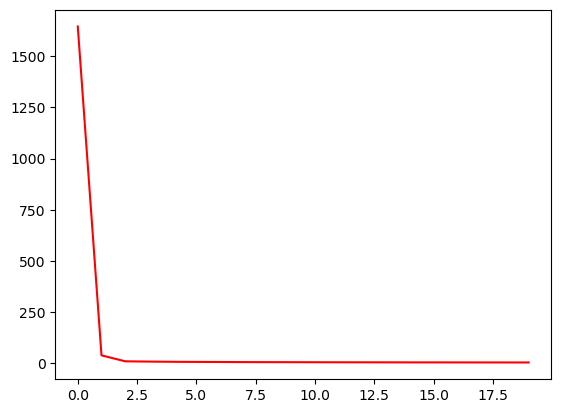

In [47]:
import matplotlib.pyplot as plt
plt.plot(val_emas[2], color='blue')
plt.plot(vals[2], color='red')
# plt.ylim(5, 10)

In [48]:
alpha = 0.1  # Adjust the decay rate as needed
weights = np.exp(-alpha * np.arange(len(X)))
weights

array([1.        , 0.90483742, 0.81873075, 0.74081822, 0.67032005,
       0.60653066, 0.54881164, 0.4965853 , 0.44932896, 0.40656966,
       0.36787944, 0.33287108, 0.30119421, 0.27253179, 0.24659696,
       0.22313016, 0.20189652, 0.18268352, 0.16529889, 0.14956862])

In [49]:
import numpy as np
from sklearn.linear_model import LinearRegression

slopes_exp = []
intercepts_exp = []
y_preds = []

for sample in range(len(df)):
    # Define an exponential decay factor (alpha) to assign weights to observations
    epochs = np.arange(20)
    val_loss_history = vals[sample]

    alpha = 0.1  # Adjust the value of alpha based on the desired emphasis on recent losses

    # Calculate the weights using exponential decay
    weights = np.exp(alpha * np.arange(len(val_loss_history)))

    # Assuming epochs is an array representing the epochs or iterations (e.g., [1, 2, 3, ...])

    # Perform exponential weighted linear regression
    X_weighted = epochs.reshape(-1, 1)  # Reshape to a single column
    y_weighted = val_loss_history.reshape(-1, 1)  # Reshape to a single column

    # Apply weights to the observations
    weighted_X = X_weighted * weights[:, np.newaxis]
    weighted_y = y_weighted * weights[:, np.newaxis]

    # Fit the weighted linear regression model
    model = LinearRegression()
    model.fit(weighted_X, weighted_y) 



    # # Assuming loss_history is your training loss history (a 1D numpy array)
    # # Assuming epochs is an array representing the epochs or iterations (e.g., [1, 2, 3, ...])
    # # Reshape loss_history and epochs to make them 2D arrays
    # X = np.arange(df['epochs'][sample]).reshape(-1, 1)  # Reshape to a single column
    # y = vals[sample].reshape(-1, 1)  # Reshape to a single column

    # # Create and fit the linear regression model
    # model = LinearRegression()
    # model.fit(X, y)

    # Retrieve the slope (coefficient) of the regression line
    slope = model.coef_[0][0]
    slopes_exp.append(slope)

    intercept = model.intercept_
    intercepts_exp.append(intercept)

    y_pred = model.predict(X_weighted)
    y_preds.append(y_pred)

    print(f"Slope and intercept of the regression line for exp {sample}: {slope}, {intercept}")


Slope and intercept of the regression line for exp 0: -1.101373210129458, [94.03999727]
Slope and intercept of the regression line for exp 1: -1.5434149503680976, [130.9890299]
Slope and intercept of the regression line for exp 2: -2.185080661975185, [179.2559134]
Slope and intercept of the regression line for exp 3: -1.5527668582970824, [130.21963118]
Slope and intercept of the regression line for exp 4: -3.1311070851773373, [251.07061387]
Slope and intercept of the regression line for exp 5: -2.190404451064606, [178.6063343]
Slope and intercept of the regression line for exp 6: -1.552616308560166, [129.11255817]
Slope and intercept of the regression line for exp 7: -1.1036393894736611, [93.28285528]
Slope and intercept of the regression line for exp 8: -1.1085012760169843, [94.63100383]
Slope and intercept of the regression line for exp 9: -1.1083074821558867, [93.41728278]
Slope and intercept of the regression line for exp 10: -1.1206243931703945, [93.10486138]
Slope and intercept o

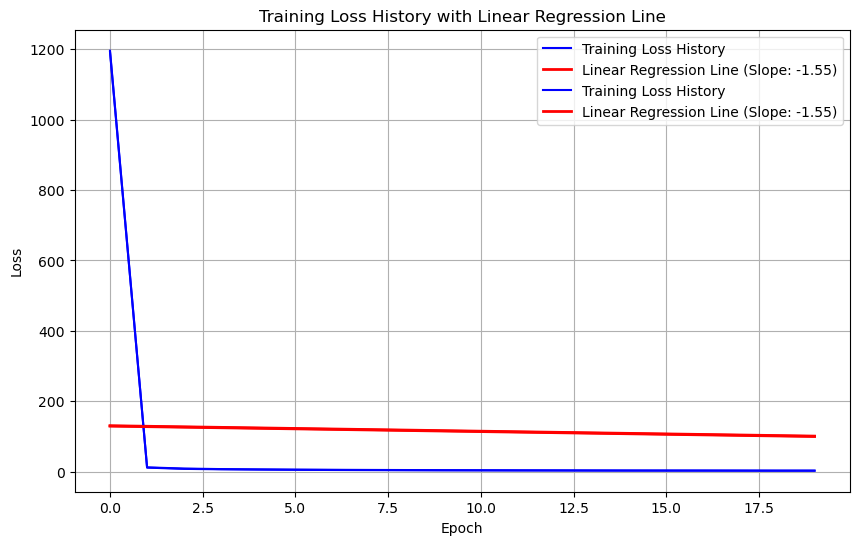

In [50]:
sample = 3
X = np.arange(20).reshape(-1, 1)

# Plot the training loss history data and the linear regression line
plt.figure(figsize=(10, 6))
plt.plot(X, vals[sample], color='blue', label='Training Loss History')
plt.plot(X, y_preds[sample], color='red', linewidth=2, label=f'Linear Regression Line (Slope: {slopes_exp[sample]:.2f})')

sample = 6
X = np.arange(20).reshape(-1, 1)

# Plot the training loss history data and the linear regression line
plt.plot(X, vals[sample], color='blue', label='Training Loss History')
plt.plot(X, y_preds[sample], color='red', linewidth=2, label=f'Linear Regression Line (Slope: {slopes_exp[sample]:.2f})')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss History with Linear Regression Line')
plt.legend()
plt.grid(True)
plt.show()

In [61]:
import numpy as np

arr = np.arange(50)
print(arr)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


In [60]:
df['epochs'][0]

50

In [119]:
def exponential_smoothing(series, alpha):
    """
    Compute exponential smoothing of given series.

    Parameters:
    - series: A pandas Series representing the time series data.
    - alpha: Smoothing factor (0 < alpha < 1).

    Returns:
    - smoothed_series: A pandas Series containing the exponentially smoothed values.
    """
    smoothed_series = []
    smoothed_series.append(series[0])  # Initialize with the first observed value

    for t in range(1, len(series)):
        smoothed_series.append(alpha * series[t] + (1 - alpha) * smoothed_series[t - 1])

    return np.array(smoothed_series)

In [122]:
exp_val = exponential_smoothing(vals[2], 0.1)

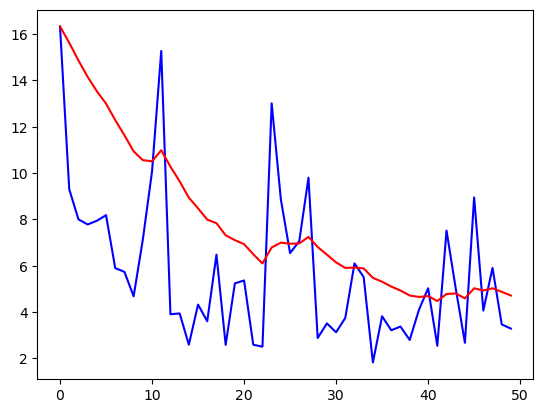

In [123]:
plt.plot(vals[2], color='blue')
plt.plot(exp_val, color='red')